# Trabajo Práctico - Organización de Datos
## Parte 1 - Análisis de datos
- Continanza, Nicolás (97576)
- De Angelis Riva, Lukas Nahuel  (103784)

#### FIUFIP: Que No Se Escape Nadie (?)

A partir de la información recolectada por FIUFIP, queremos hacer un análisis que nos permita inferir qué ciudadanos tienen un alto poder adquisitivo. Para esto, y tomando en cuenta la información con la que contamos y sus limitaciones, creemos que será valioso poder responder las siguientes preguntas, y evaluar si nos aportan información útil:

1. ¿Cuántas personas tienen un alto poder adquisitivo en los datos recolectados por la agencia?
2. ¿Hay alguna relación entre la edad de las personas encuestadas y su poder adquisitivo?
3. ¿Existe un cambio notable en la respuesta a la pregunta anterior si separamos la muestra por género?
4. Respondiendo las tres preguntas anteriores podríamos encontrar una relación entre las variables edad y género, y sería interesante saber qué tan similar o disímil es la variable edad entre los tipos de trabajo que realizan. Entonces, ¿Cómo se distribuye la edad de las personas encuestadas según su trabajo?
6. ¿Qué se puede decir sobre los tipos de sala más elegidos separando a los encuestados por edad?
7.
8.

## Imports y puesta en escena

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from matplotlib import pyplot as plt
import matplotlib

import numpy as np

GSPREADHSEET_DOWNLOAD_URL = (
    "https://docs.google.com/spreadsheets/d/{gid}/export?format=csv&id={gid}".format
)
TP_GID = '1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0'
df = pd.read_csv(GSPREADHSEET_DOWNLOAD_URL(gid=TP_GID))

Para empezar, utilizamos la función feature_engineering a la que llegamos en `haciendoUnPocoDeIngenieria.ipynb` tras analizar las características del dataset.

In [3]:
def feature_engineering(df):
    # Missings en barrio
    data_set_mejorado = df.copy()
    barrios = df['barrio'].dropna()
    cantidad = df['barrio'].isna().value_counts()[True]
    muestra = barrios.sample(cantidad)
    it = iter(muestra)
    data_set_mejorado['barrio'] = data_set_mejorado['barrio'].apply(lambda x: next(it) if str(x) == 'nan' else x)

    # Missings en categoría de trabajo
    data_set_mejorado['categoria_de_trabajo'] = data_set_mejorado['categoria_de_trabajo'].apply(lambda x: 'Sin categoria' if str(x) == 'nan' else x)

    # Missings en trabajo
    data_set_mejorado['trabajo'] = data_set_mejorado['trabajo'].apply(lambda x: 'No responde' if str(x) == 'nan' else x)

    # Eliminación de categoría "sin trabajo"
    data_set_mejorado = data_set_mejorado[data_set_mejorado.categoria_de_trabajo != 'sin_trabajo']

    # Eliminación de el atributo eduación alcanzada
    del data_set_mejorado['educacion_alcanzada']

    # Juntamos casado y casada en una misma categoría.
    data_set_mejorado['rol_familiar_registrado'] = data_set_mejorado['rol_familiar_registrado'].apply(lambda x : 'casado' if x == 'casada' else x)
    
    return data_set_mejorado

In [4]:
df = feature_engineering(df)

## Distribución del poder adquisitivo

Comencemos por estudiar qué porcentaje de la muestra tomada tiene un poder adquisitivo elevado. Como se trata de una variable binaria y dicotómica, de la que solo nos interesa conocer su tendencia, mostraremos su distribución en un gráfico de torta.

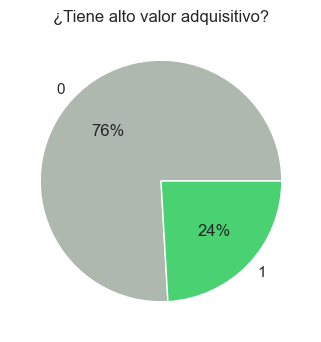

In [5]:
plt.figure(dpi=100)
df["tiene_alto_valor_adquisitivo"].value_counts().plot(
    kind='pie', autopct='%1.0f%%', colors=['#AEB8AF', '#4AD172']
)
plt.title('¿Tiene alto valor adquisitivo?')
plt.ylabel("")
plt.show()

Vemos que más de las tres cuartas partes de la muestra no tienen un elevado poder adquisitivo.

## Relación con la edad

### Histograma por edad

A continuación estudiamos la distribución de edades en la muestra tomada, agrupando en bins de a 10 años la cantidad de personas en la muestra, para simplicidad y legibilidad del gráfico.

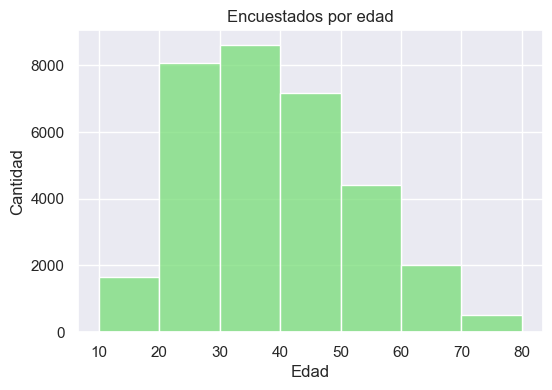

In [6]:
plt.figure(dpi=100)
sns.histplot(
    x='edad',
    data=df,
    color=('#77dd77'),
    bins=range(10, df['edad'].max(), 10)
)
plt.ylabel("Cantidad")
plt.xlabel("Edad")
plt.title("Encuestados por edad")
plt.show()

### Relación entre rango etario y poder adquisitivo

Veamos ahora cómo se distribuye el poder adquisitivo dentro de los rangos etarios que tomamos en el caso anterior.

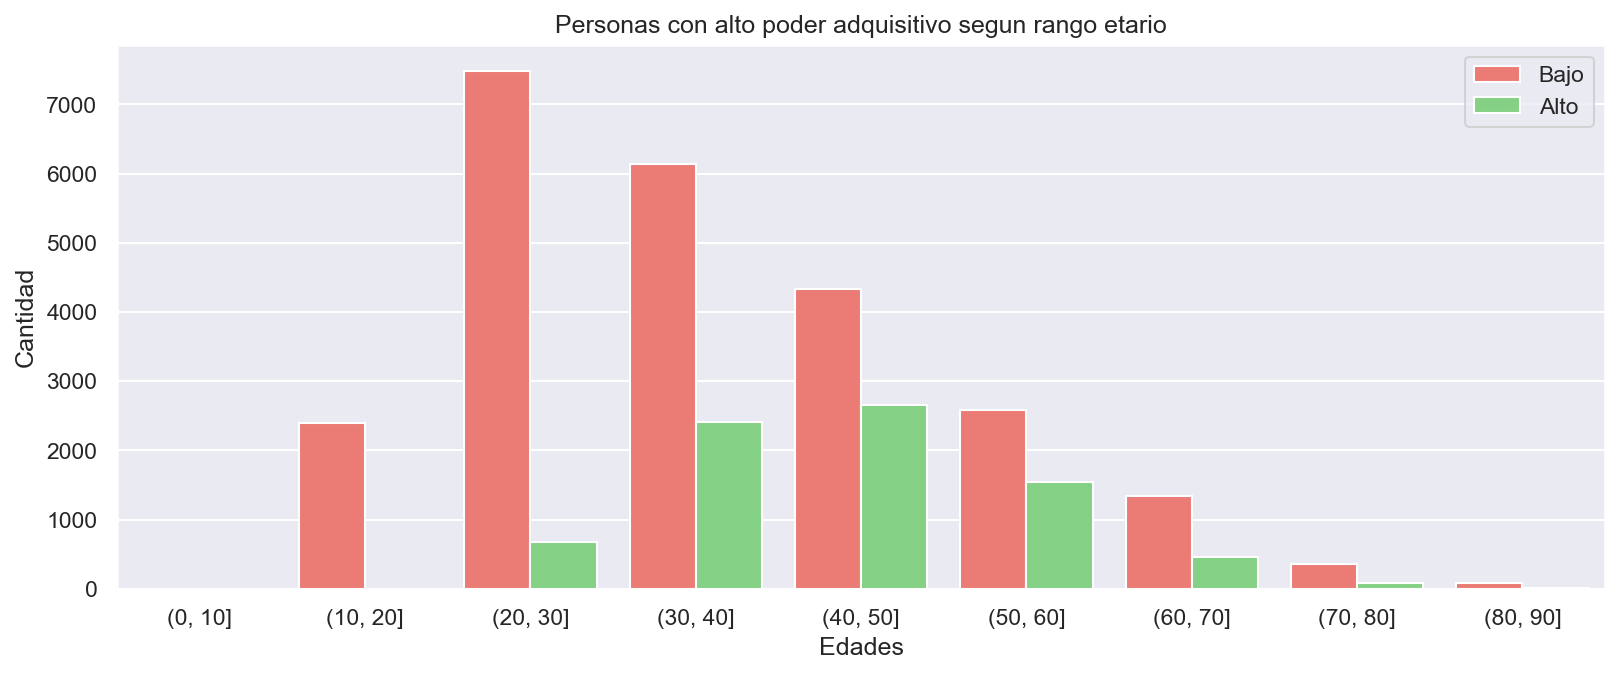

In [7]:
df_tmp = pd.DataFrame([df.edad, df.tiene_alto_valor_adquisitivo]).transpose()
df_tmp['bins'] = pd.cut(df_tmp.edad, range(0, int(df_tmp['edad'].max()) + 10,10))
# Configuro el grafico, armo el countplot y setteo labels varios
fig, ax = plt.subplots(dpi=150, figsize=(6.4 * 2, 4.8))
sns.countplot(data = df_tmp, x = 'bins', hue='tiene_alto_valor_adquisitivo', ax = ax, palette = ['#ff6961', '#77dd77'])
ax.set_title('Personas con alto poder adquisitivo segun rango etario')
ax.set_xlabel('Edades')
ax.set_ylabel('Cantidad')
plt.legend(['Bajo', 'Alto'], loc='upper right')
plt.show()

Como podemos ver, es más probable encontrar personas de alto poder adquisitivo entre aquellas que están entre los 30 y 70 años de edad. Mucho menos probable es que esto ocurra para personas de entre 20 y 30 años o 70 y 80 años y no ocurrirá para personas menores de 20 y mayores de 80, aunque cabe notar que de 70 años en adelante son muy pocas las muestras tomadas.

También podríamos ver esta misma relación en un gráfico de densidad

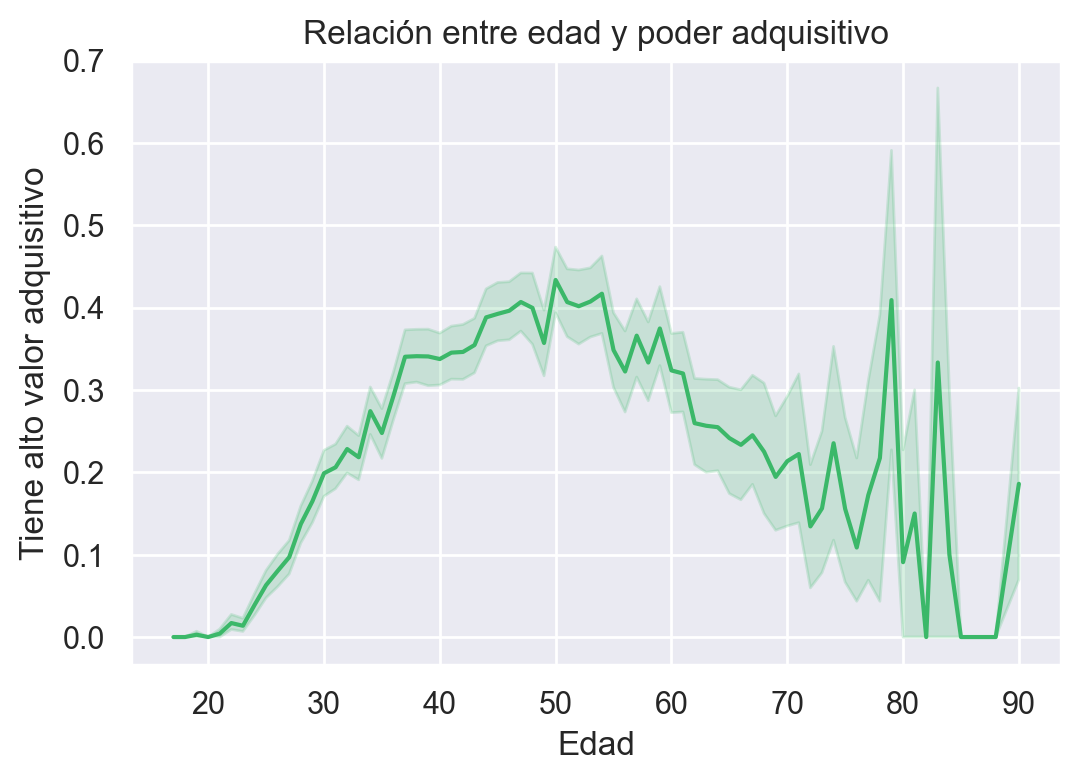

In [8]:
plt.figure(dpi=200)
sns.lineplot(
    data = df,
    x = 'edad',
    y = 'tiene_alto_valor_adquisitivo',
    color=(0.23, 0.72, 0.41)
)
plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Edad")
plt.title('Relación entre edad y poder adquisitivo')
plt.show()

Se puede observar como los valores intermedios de edad, es decir aquellos entre 30 y 70 tienen la mayor densidad de población con alto poder adquisitivo.

Asímismo también vemos que los valores posteriores, es decir aquellos mayores a 80 tienen valores fluctuantes y poco fiables, probablemente debido a la escasez de datos para dichas edades, como se puede ver en el histograma previo.

! Veamos de descartar para el lineplot la información fuera de el rango [35, 70]


## Relación entre la declaración de gananacias, pérdidas o no declaración en bolsa y el poder adquisitivo.

Continuaremos por analizar si existe una relación entre la actividad en la bolsa argentina y el poder adquisitivo de las personas que allí operan. Discriminaremos a este conjunto según quienes declararon pérdidas, ganancias o ninguna de ambas.

In [22]:
def determinar_categoria_en_bolsa(accion_en_bolsa):
    if(accion_en_bolsa > 0):
        return 'Ganancia'
    elif(accion_en_bolsa < 0):
        return 'Pérdida'
    else:
        return 'Nada'

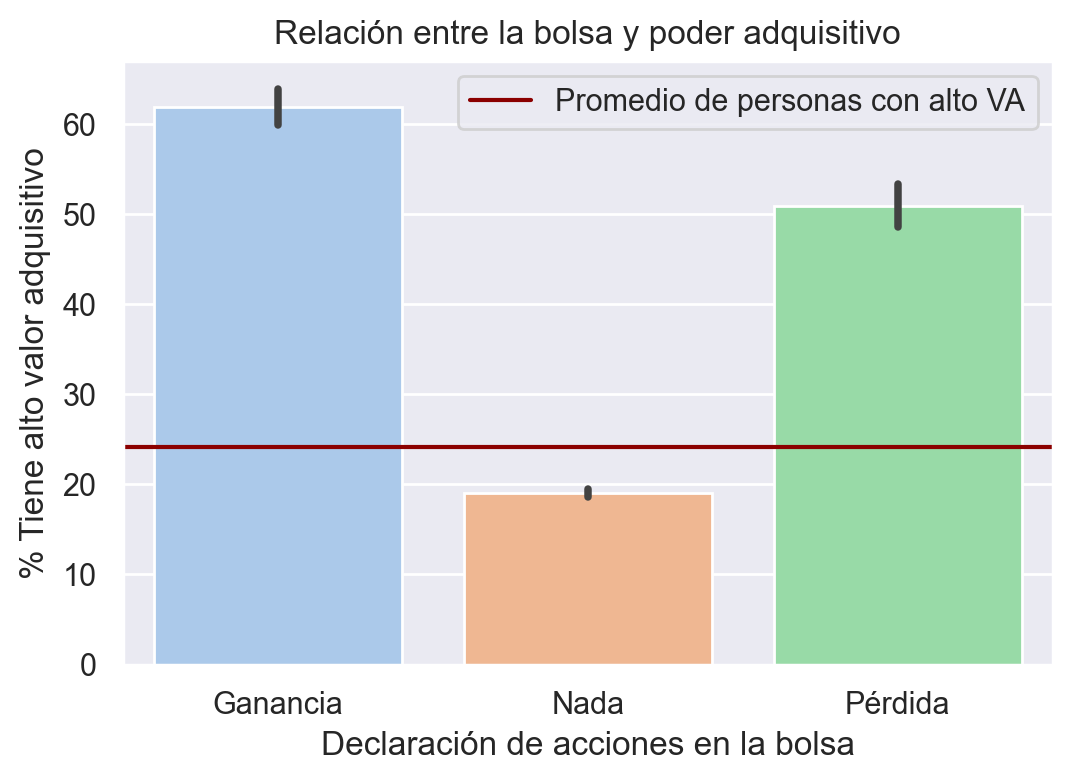

In [30]:
df_bolsa_vs_va = df[['ganancia_perdida_declarada_bolsa_argentina', 'tiene_alto_valor_adquisitivo']].copy()
df_bolsa_vs_va['bolsa'] = df_bolsa_vs_va['ganancia_perdida_declarada_bolsa_argentina'].apply(determinar_categoria_en_bolsa)
del df_bolsa_vs_va['ganancia_perdida_declarada_bolsa_argentina']

plt.figure(dpi=200)
ax = sns.barplot(
    data=df_bolsa_vs_va,
    palette="pastel",
    x='bolsa',
    y='tiene_alto_valor_adquisitivo',
    estimator=lambda x: np.mean(x)*100.0
)
plt.ylabel("% Tiene alto valor adquisitivo")
plt.xlabel("Declaración de acciones en la bolsa")
plt.title('Relación entre la bolsa y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()*100.0
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

Parece haber una relación bastante marcada con la gente que declaró un balance neto 0 en acciones de la bolsa y su poder adquisitivo, donde cerca del 80% de estas personas tienen un poder adquisitivo bajo.

También se aprecia una leve inclinación hacia el alto poder adquisitivo en la gente que declaró haber tenido ganancias en la bolsa.

Finalmente, alrededor de la mitad de las personas que declararon un balance negativo en la bolsa tienen poder adquisitivo alto.

Dado que el promedio general de personas con poder adquisitivo alto es de aproximadamente un 25%, si sabemos que una persona toma acciones en la bolsa (ya sea con pérdidas o ganancias) se obtiene un promedio de casi el doble. Es decir, este parámetro parece estar sensiblemente relacionado con el poder adquisitivo.

### Relación entre localidad y poder adquisitivo

Continuaremos por estudiar la relación entre la localidad en que las personas muestreadas viven y su poder adquisitivo, considerando estadísticamente significativos aquellos barrios de los que tengamos 50 muestras o más. 

In [9]:
cant = 50

tabla = df['barrio'].value_counts()
barrios_significativos = tabla[tabla > cant].reset_index()['index'].unique()

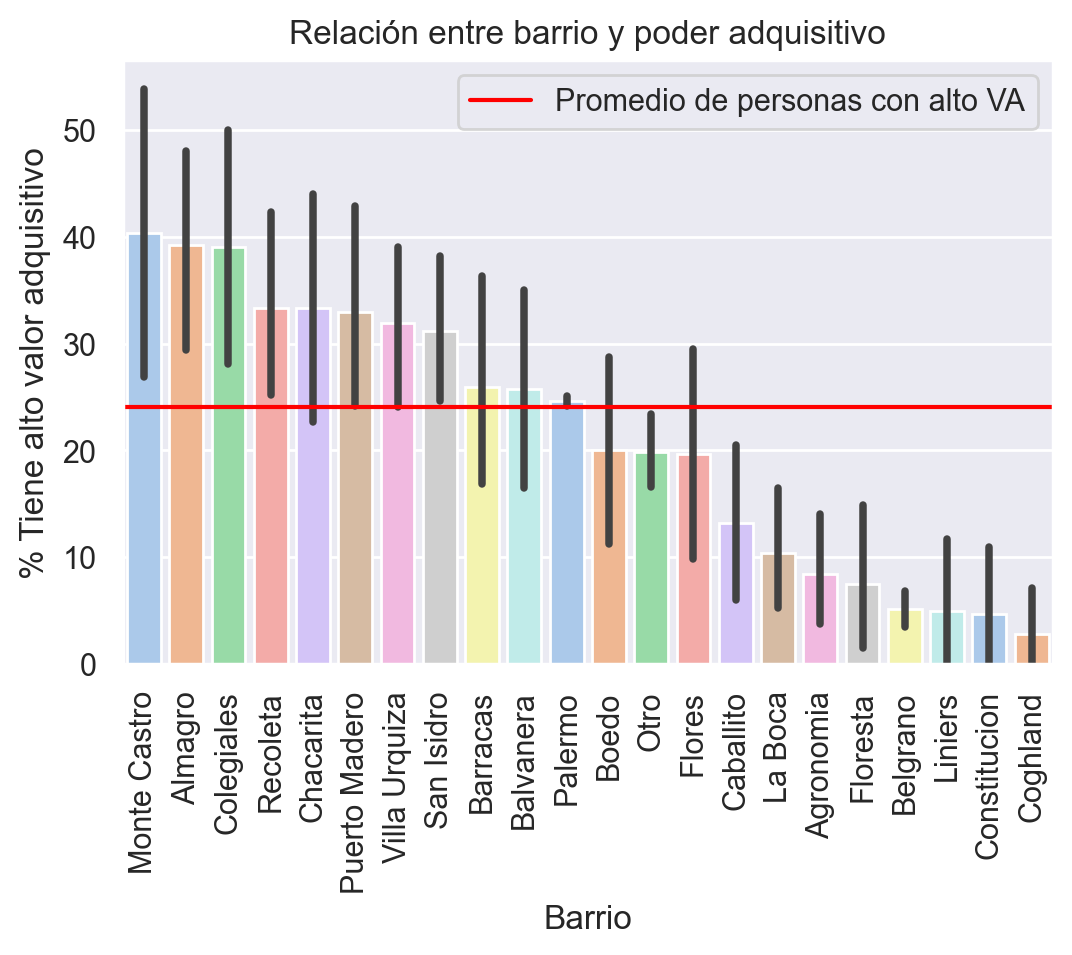

In [41]:
plt.figure(dpi=200)


df_barrio_vs_va = df[['barrio', 'tiene_alto_valor_adquisitivo']].copy()
df_barrio_vs_va['barrio'] = df_barrio_vs_va['barrio'].apply(lambda x: x if x in barrios_significativos else 'Otro')
orden = df_barrio_vs_va.groupby(['barrio'])['tiene_alto_valor_adquisitivo'].aggregate(lambda x : np.mean(x)).reset_index().sort_values('tiene_alto_valor_adquisitivo', ascending = False)

ax = sns.barplot(
    data=df_barrio_vs_va,
    palette="pastel",
    x='barrio',
    y='tiene_alto_valor_adquisitivo',
    order=orden['barrio'],
    estimator=lambda x: np.mean(x)*100.0
)

plt.ylabel("% Tiene alto valor adquisitivo")
plt.xlabel("Barrio")
plt.xticks(rotation=90)
plt.title('Relación entre barrio y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()*100.0
plt.axhline(prom, color="red", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

Si bien hay cierta concentración de personas de la muestra con alto poder adquisitivo en barrios como Almagro, Monte Castro o Colegiales, el porcentaje que alcanza es tal que el barrio en el que la gente vive no nos permite decidir si tienen un alto poder adquisitivo, pero sí nos permiten ver si no lo tienen, como es el caso de barrios como La Boca, Agronomía, Floresta, Constitución, Belgrano, Coghland o Liniers.

### Relación entre años de educación y poder adquisitivo

Veamos cómo se relacionan los años de educación alcanzados con el poder adquisitivo.

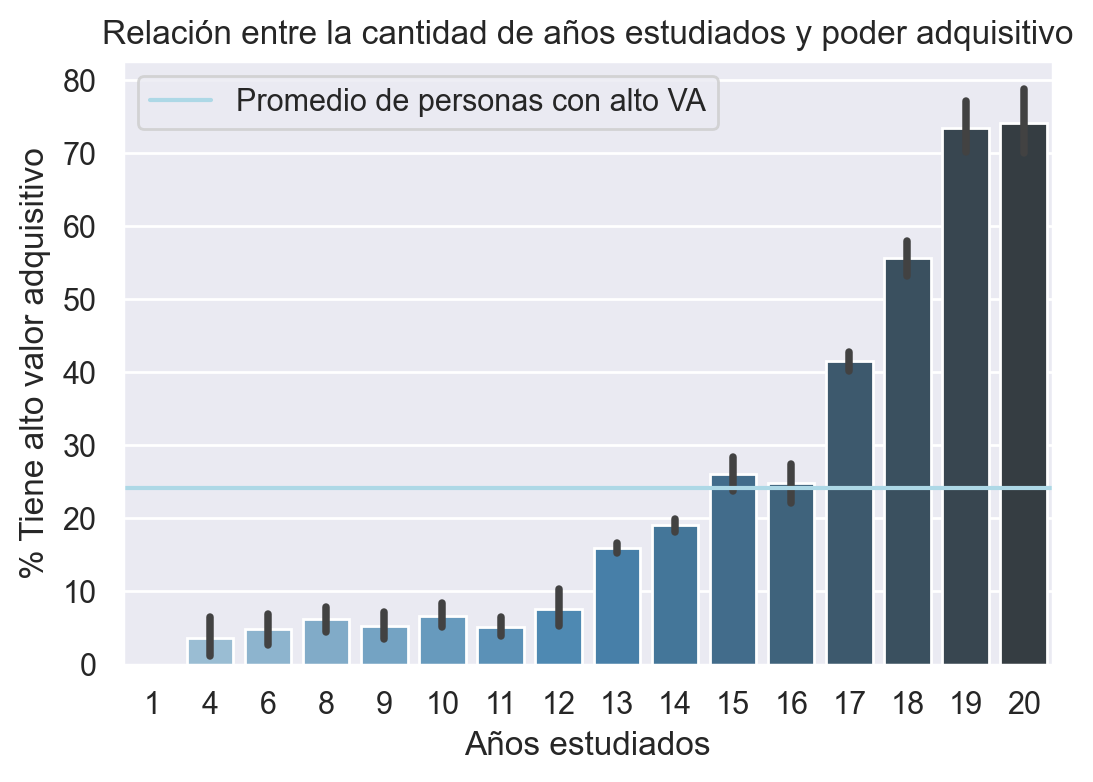

In [55]:
plt.figure(dpi=200)

df_educacion_vs_va = df[['anios_estudiados', 'tiene_alto_valor_adquisitivo']].copy()
ax = sns.barplot(
    data=df_educacion_vs_va,
    palette="Blues_d",
    x='anios_estudiados',
    y='tiene_alto_valor_adquisitivo',
    estimator = lambda x: np.mean(x)*100.0
)

plt.ylabel("% Tiene alto valor adquisitivo")
plt.xlabel("Años estudiados")
plt.title('Relación entre la cantidad de años estudiados y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()*100.0
plt.axhline(prom, color="lightblue", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

Vemos que hay una relación muy marcada entre estas dos variables, donde quienes tienen 12 años de estudio o menos se encuentran entre la población de menor poder adquisitivo, y quienes superan los 18 años de estudio tienden a tener un poder adquisitivo alto.

### Relación entre el rol familiar y el poder adquisitivo

Analizaremos a continuación si existe una relación entre el rol familiar y el poder adquisitivo de las muestras.

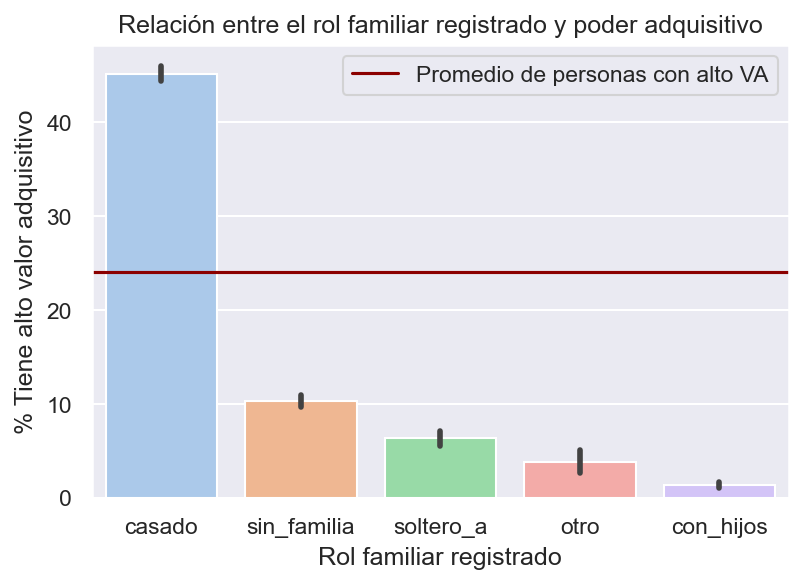

In [75]:
plt.figure(dpi=150)


df_rol_familiar_vs_va = df[['rol_familiar_registrado', 'tiene_alto_valor_adquisitivo']].copy()
orden = df_rol_familiar_vs_va.groupby(['rol_familiar_registrado'])['tiene_alto_valor_adquisitivo'].aggregate(lambda x : np.mean(x)).reset_index().sort_values('tiene_alto_valor_adquisitivo', ascending = False)

ax = sns.barplot(
    data=df_rol_familiar_vs_va,
    palette = "pastel",
    x='rol_familiar_registrado',
    y='tiene_alto_valor_adquisitivo',
    order=orden['rol_familiar_registrado'],
    estimator = lambda x : np.mean(x)*100.0
)

plt.ylabel("% Tiene alto valor adquisitivo")
plt.xlabel("Rol familiar registrado")
plt.title('Relación entre el rol familiar registrado y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()*100.0
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

Nuevamente estamos ante una variable que, si bien no nos ayuda a estimar si un individuo de la muestra tiene poder adquisitivo alto, si nos permite afirmar con una baja probabilidad de error que aquellas personas con hijos, solteras/os y otros tienen un poder adquisitivo bajo.

### Relación entre el estado marital y el poder adquisitivo

Seguiremos por estudiar cómo se vinculan las variables estado marital y poder adquisitivo.

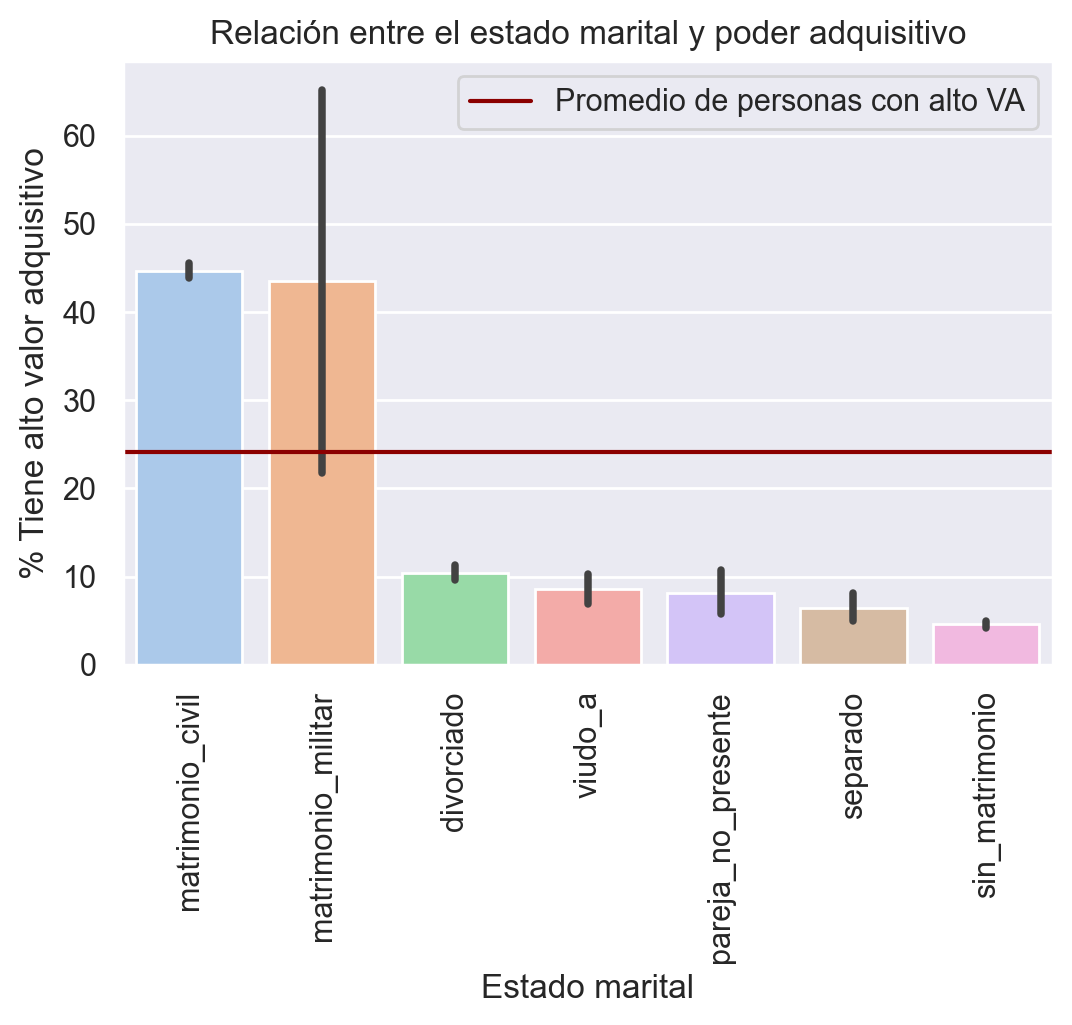

In [74]:
plt.figure(dpi=200)

df_estado_marital_vs_va = df[['estado_marital', 'tiene_alto_valor_adquisitivo']].copy()
orden = df_estado_marital_vs_va.groupby(['estado_marital'])['tiene_alto_valor_adquisitivo'].aggregate(lambda x : np.mean(x)).reset_index().sort_values('tiene_alto_valor_adquisitivo', ascending = False)

ax = sns.barplot(
    data=df_estado_marital_vs_va,
    palette = "pastel",
    x='estado_marital',
    y='tiene_alto_valor_adquisitivo',
    order=orden['estado_marital'],
    estimator = lambda x: np.mean(x)*100.0
)

plt.ylabel("% Tiene alto valor adquisitivo")
plt.xlabel("Estado marital")
plt.xticks(rotation=90)
plt.title('Relación entre el estado marital y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()*100.0
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

Una vez más, vemos que las personas viudas, con pareja no presente, separadas o sin matrimonio tienen una marcada tendencia a que su poder adquisitivo sea bajo, mientras que aquellas personas en matrimonio (sea civil o militar) se acercan a la equidad entre muestras con alto poder adquisitivo y con bajo poder adquisitivo. 

### Relación entre el tipo de trabajo y el poder adquisitivo

Sigamos por ver si hay relación entre el tipo de trabajo y el poder adquisitivo de cada persona.

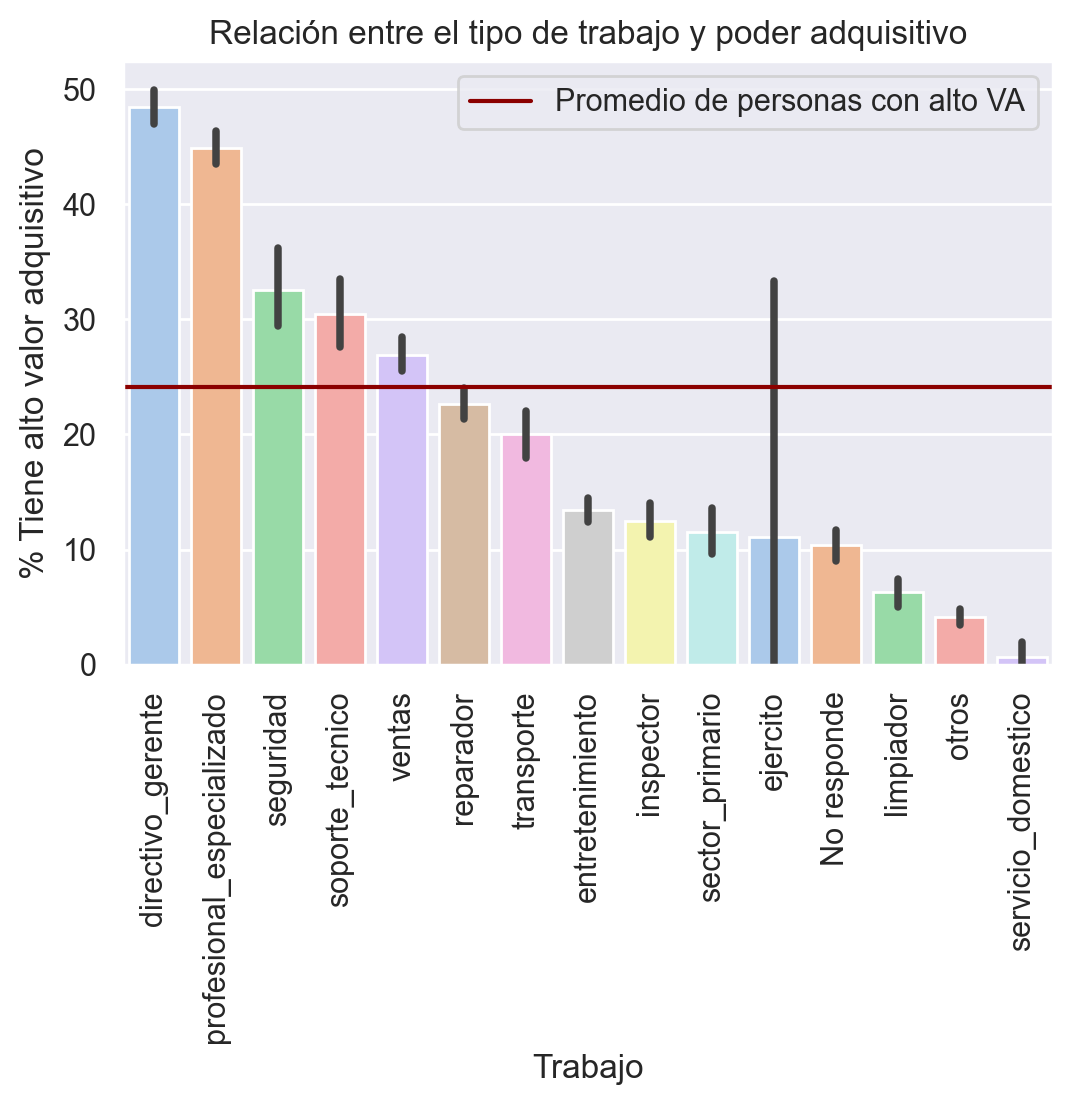

In [73]:
plt.figure(dpi=200)


df_trabajo_vs_va = df[['trabajo', 'tiene_alto_valor_adquisitivo']].copy()
orden = df_trabajo_vs_va.groupby(['trabajo'])['tiene_alto_valor_adquisitivo'].aggregate(lambda x : np.mean(x)).reset_index().sort_values('tiene_alto_valor_adquisitivo', ascending = False)

ax = sns.barplot(
    data=df_trabajo_vs_va,
    palette="pastel",
    x='trabajo',
    y='tiene_alto_valor_adquisitivo',
    order=orden['trabajo'],
    estimator=lambda x: np.mean(x)*100.0
)

plt.ylabel("% Tiene alto valor adquisitivo")
plt.xlabel("Trabajo")
plt.xticks(rotation=90)
plt.title('Relación entre el tipo de trabajo y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()*100.0
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

Aquí podemos ver que quienes realicen los tipos de trabajo servicio doméstico, otros, limpiador y quienes no responden tendrán, en su mayoría, un poder adquisitivo bajo. Similar es el caso del ejército, donde además vemos una alta varianza entre las muestras tomadas.

### Relación con horas trabajadas

Veamos si hay una relación entre las horas trabajadas y el poder adquisitivo.

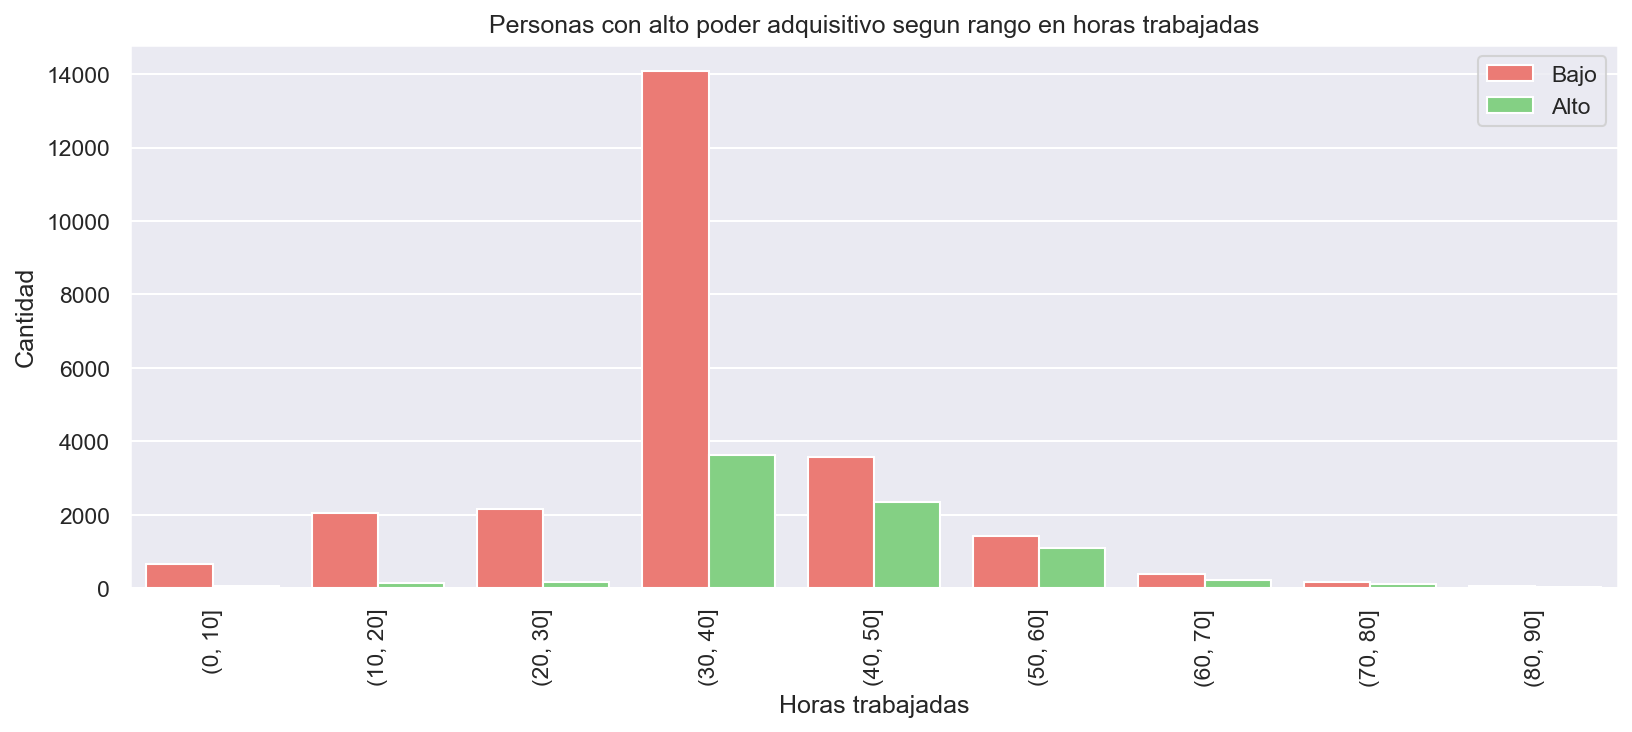

In [69]:
df_tmp = pd.DataFrame([df.horas_trabajo_registradas, df.tiene_alto_valor_adquisitivo]).transpose()
df_tmp['bins'] = pd.cut(df_tmp.horas_trabajo_registradas, range(0, 100, 10)) # ver si 10 o 5 el tamaño
# Configuro el grafico, armo el countplot y setteo labels varios
fig, ax = plt.subplots(dpi=150, figsize=(6.4 * 2, 4.8))
sns.countplot(data = df_tmp, x = 'bins', hue='tiene_alto_valor_adquisitivo', ax = ax, palette = ['#ff6961', '#77dd77'])
ax.set_title('Personas con alto poder adquisitivo segun rango en horas trabajadas')
ax.set_xlabel('Horas trabajadas')
plt.xticks(rotation=90)
ax.set_ylabel('Cantidad')
plt.legend(['Bajo', 'Alto'], loc='upper right')
plt.show()

Vemos que en los casos en que las horas trabajadas son menores o iguales a 30 casi todas las personas muestreadas tienen un poder adquisitivo bajo. Los individuos con poder adquisitivo alto empiezan a aparecer en su mayoría a partir de las 30 horas trabajadas, y para 40 horas en adelante empiezan a ocupar un porcentaje importante de la muestra. Por ejemplo, para quienes trabajan entre 50 y 60 horas, la relación es casi 50/50.

### Religion

Analizaremos también si la variable religión se relaciona de alguna manera con el poder adquisitivo.

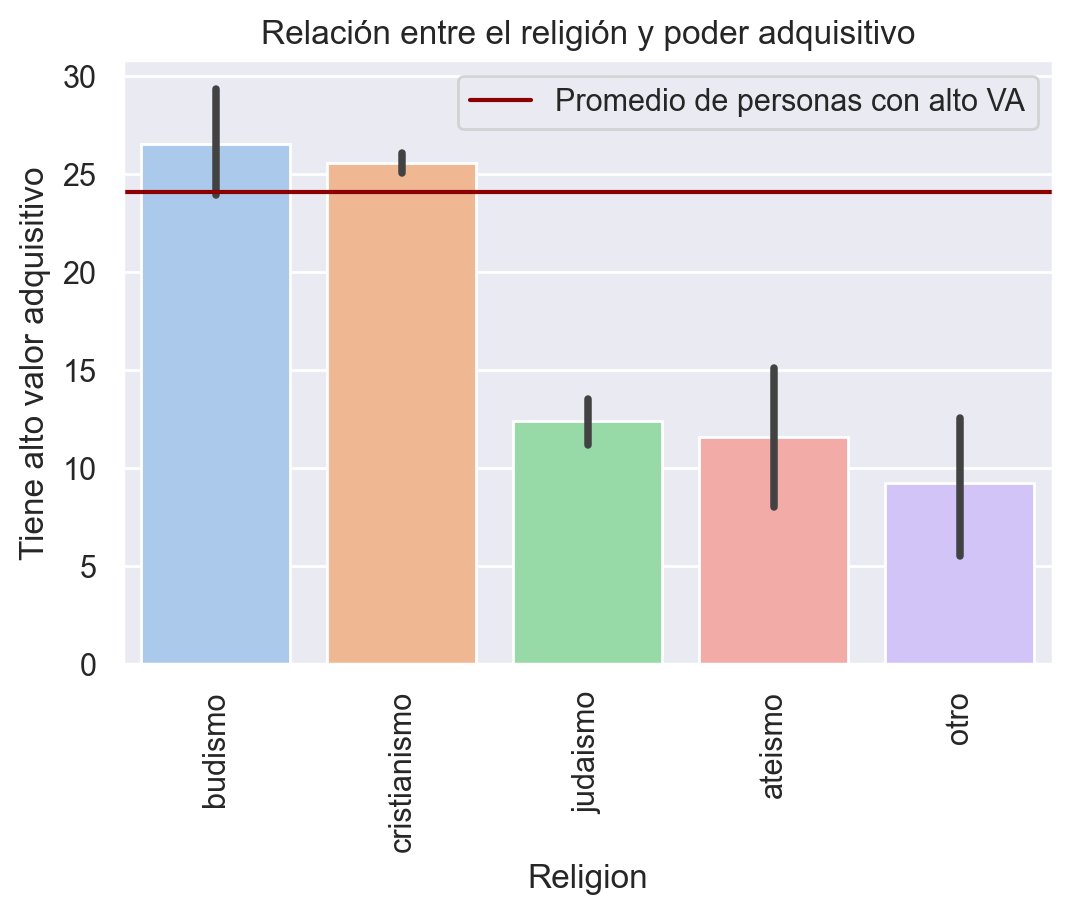

In [72]:
plt.figure(dpi=200)

orden = df.groupby(['religion'])['tiene_alto_valor_adquisitivo'].aggregate(lambda x : np.mean(x)).reset_index().sort_values('tiene_alto_valor_adquisitivo', ascending = False)

ax = sns.barplot(
    data=df,
    palette="pastel",
    x='religion',
    y='tiene_alto_valor_adquisitivo',
    order=orden['religion'],
    estimator=lambda x: np.mean(x)*100.0
)

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Religion")
plt.xticks(rotation=90)
plt.title('Relación entre el religión y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()*100.0
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

Si bien no parece ser una variable que sirva para inferir el poder adquisitivo de una persona, vemos una tendencia al poder adquisitivo bajo entre quienes profesan el judaísmo, los ateos y quienes pertenecen a otras religiones.

### Género

Finalmente, veamos cómo se distribuye el poder adquisitivo según el género.

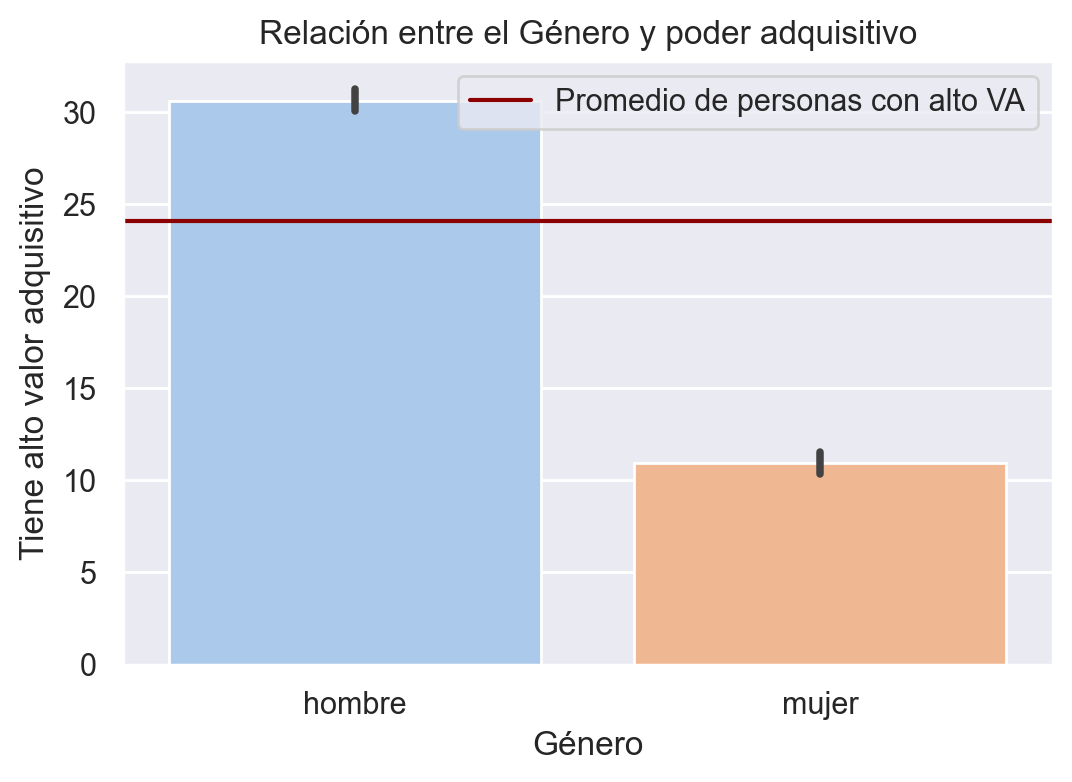

In [91]:
plt.figure(dpi=200)


orden = df.groupby(['genero'])['tiene_alto_valor_adquisitivo'].aggregate(lambda x : np.mean(x)).reset_index().sort_values('tiene_alto_valor_adquisitivo', ascending = False)

ax = sns.barplot(
    data=df,
    x='genero',
    y='tiene_alto_valor_adquisitivo',
    order=orden['genero'],
    palette="pastel",
    estimator=lambda x: np.mean(x)*100.0
)

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Género")
plt.title('Relación entre el Género y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()*100.0
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

Vemos una diferencia porcentual importante, donde las mujeres tienen una tendencia fuerte a tener un poder adquisitivo bajo y apenas más del 10% de ellas cuentan con un poder adquisitivo alto.

# Intersección de categorías 

De aquí en adelante, estudiaremos qué resulta de intersecar las categorías de dos atributos de la población que estamos estudiando, para intentar entender cuáles de dichos atributos son los que más influyen sobre el poder adquisitivo de una persona.

Comencemos por estudiar si hay una relación entre la religión y el género que incida sobre el poder adquisitivo de las personas muestreadas.

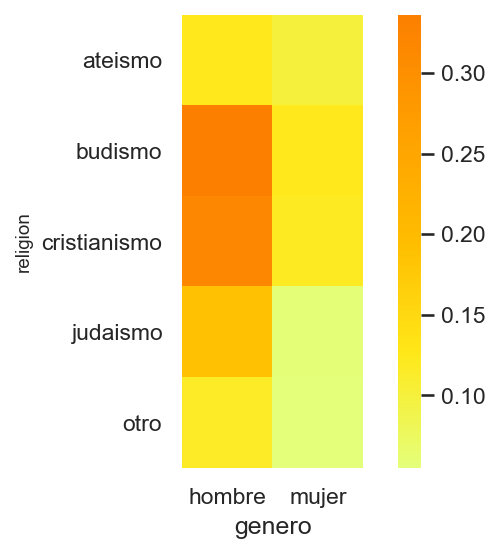

In [234]:
cooccurrence = pd.pivot_table(
    df,
    'tiene_alto_valor_adquisitivo',
    'religion',
    'genero',
    'mean'
).sort_index()

plt.figure(dpi=150)
plt.ylabel("Valor adquisitivo respecto del genero y la religion", fontsize=9)
sns.heatmap(cooccurrence, square=True, cmap="Wistia")
plt.show()

Vemos que las mujeres que indicaron el judaísmo u otra religión presentan un bajo poder adquisitivo en general, pero en otros casos no parece ser una variable que sirva para determinar el valor de la variable target.

A continuación, veremos qué sucede al intersecar los atributos género y resultado en la bolsa.

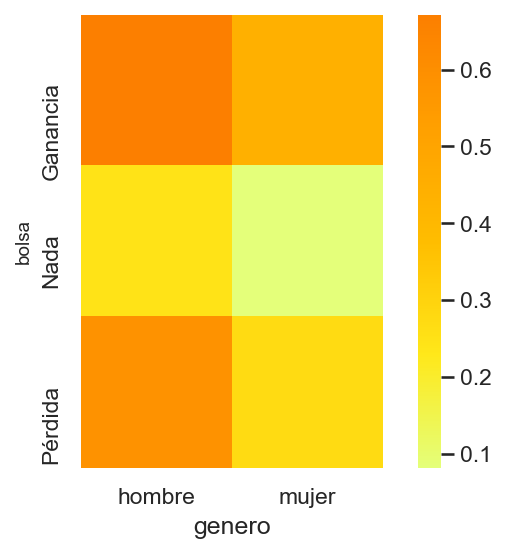

In [235]:
df_bolsa_vs_va = df[['genero','ganancia_perdida_declarada_bolsa_argentina', 'tiene_alto_valor_adquisitivo']].copy()
df_bolsa_vs_va['bolsa'] = df_bolsa_vs_va['ganancia_perdida_declarada_bolsa_argentina'].apply(determinar_categoria_en_bolsa)
del df_bolsa_vs_va['ganancia_perdida_declarada_bolsa_argentina']

cooccurrence = pd.pivot_table(
    df_bolsa_vs_va,
    'tiene_alto_valor_adquisitivo',
    'bolsa',
    'genero',
    'mean'
).sort_index()

plt.figure(dpi=150)
plt.ylabel("Valor adquisitivo respecto del genero y sus movimientos en la bolsa argentina", fontsize=9)
sns.heatmap(cooccurrence, square=True, cmap="Wistia")
plt.show()

Aquí hay algunos resultados más interesantes. Las mujeres que no reportan pérdidas ni ganancias en la bolsa tienen, casi en su totalidad, bajo poder adquisitivo. Por el contrario, más del 60% de los hombres que declaran ganancias en la bolsa tienen poder adquisitivo alto, seguidos por aquellos que reportan pérdidas que tienen alto poder adquisitivo, que están alrededor del 50%. 

Seguiremos por ver la relación entre los resultados en la bolsa argentina, el nivel de estudios alcanzado y el poder adquisitivo. Para analizar esto, consideraremos nivel universitario completo a quienes tengan más de 17 años de estudio, y universitario completo a quienes tengan más de 14 y hasta 17 años de estudio.

In [80]:
def categorizar_por_educacion(anios_estudiados):
    if(anios_estudiados <= 1):
        return 'prescolar'
    elif(anios_estudiados <= 9):
        if(anios_estudiados == 9):
            return 'primario_completo'
        return 'primario_incompleto'
    elif(anios_estudiados <= 14):
        if(anios_estudiados== 14):
            return 'secundario_completo'
        return 'secundario_incompleto'
    elif(anios_estudiados <= 17):
        return 'universitario_incompleto'
    return 'universitario_completo'

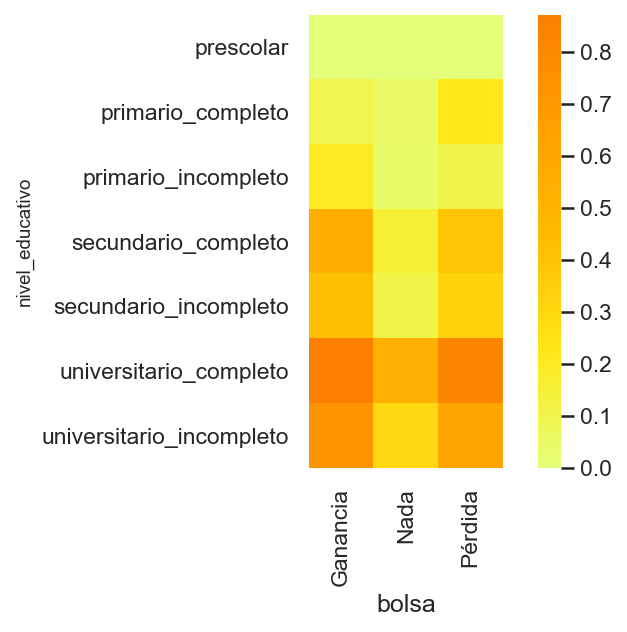

In [81]:
df_tmp = df[['anios_estudiados', 'ganancia_perdida_declarada_bolsa_argentina', 'tiene_alto_valor_adquisitivo']].copy()
df_tmp['bolsa'] = df_tmp['ganancia_perdida_declarada_bolsa_argentina'].apply(determinar_categoria_en_bolsa)
df_tmp['nivel_educativo'] = df_tmp['anios_estudiados'].apply(categorizar_por_educacion)

cooccurrence = pd.pivot_table(
    df_tmp,
    'tiene_alto_valor_adquisitivo',
    'nivel_educativo',
    'bolsa',
    'mean'
).sort_index()

plt.figure(dpi=150)
plt.ylabel("Valor adquisitivo respecto del nivel educativo y el rendimiento en la bolsa", fontsize=9)
sns.heatmap(cooccurrence, square=True, cmap="Wistia")
plt.show()

Vemos una fuerte influencia del nivel educativo sobre el poder adquisitivo de la población que estamos estudiando. Para empezar, es muy probable acertar al afirmar que quienes hayan concluído estudios universitarios tienen un poder adquisitivo elevado, en particular si presentaron pérdidas o ganancias en la bolsa. También, aunque con una probabilidad de acierto menor, para quienes no hayan concluido su formación universitaria. También hay una baja probabilidad de encontrar individuos con poder adquisitivo alto entre quienes solo cuenten con el nivel prescolar o el nivel primaro completo o incompleto.

Seguiremos estudiando la influencia del nivel educativo, esta vez intersecándolo con las categorías del atributo categoría de trabajo.

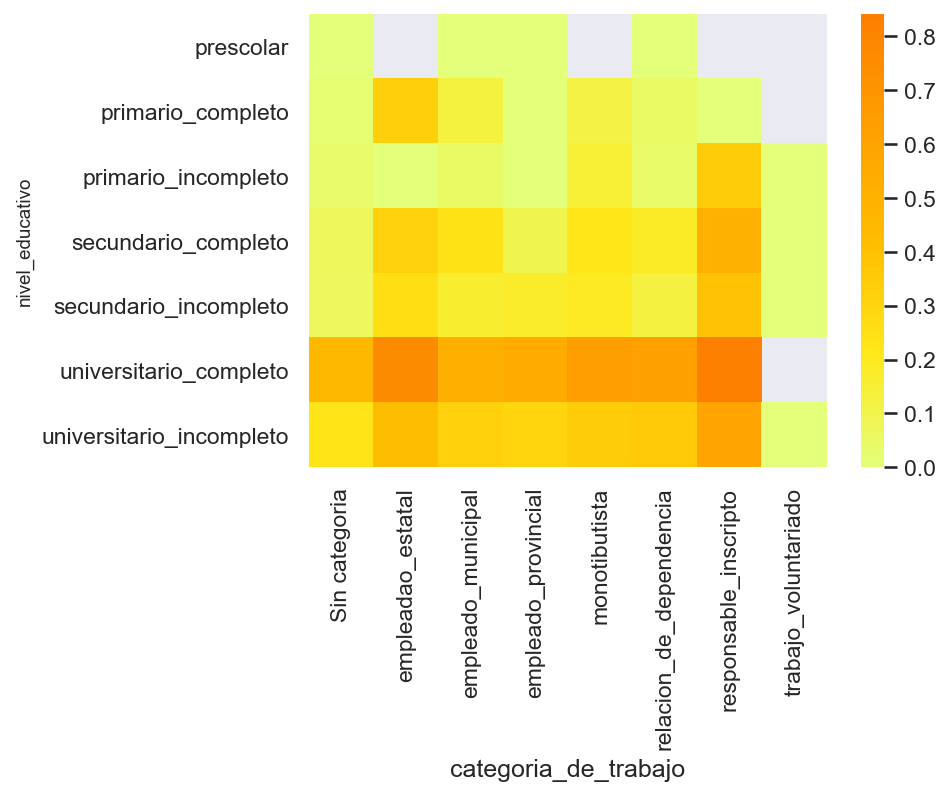

In [238]:
df_tmp = df[['anios_estudiados', 'categoria_de_trabajo', 'tiene_alto_valor_adquisitivo']].copy()
df_tmp['nivel_educativo'] = df_tmp['anios_estudiados'].apply(categorizar_por_educacion)

cooccurrence = pd.pivot_table(
    df_tmp,
    'tiene_alto_valor_adquisitivo',
    'nivel_educativo',
    'categoria_de_trabajo',
    'mean'
).sort_index()

plt.figure(dpi=150)
plt.ylabel("Valor adquisitivo respecto del nivel educativo y la categoria de trabajo", fontsize=9)
sns.heatmap(cooccurrence, square=True, cmap="Wistia")
plt.show()


Seguimos viendo un fuerte efecto del nivel universitario completo sobre el poder adquisitivo, y ahora sumamos la categoría de responsable inscripto, donde una buena parte de quienes pertenecen a esta categoría de trabajo cuentan con un poder adquisitivo elevado. Más aún, quienes completaron sus estudios universitarios y son responsables inscriptos concentran a la mayor cantidad de individuos con alto poder adquisitivo de la partición tomada.

Retomaremos el estudio del atributo que representa los resultados en la bolsa, y lo intersecaremos con el atributo edad.

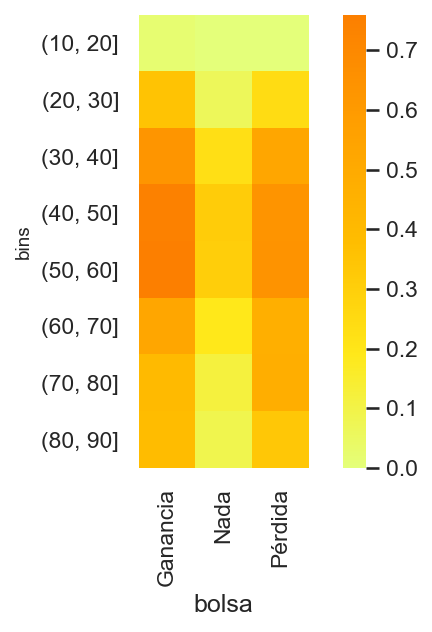

In [239]:

df_tmp = df[['edad', 'ganancia_perdida_declarada_bolsa_argentina', 'tiene_alto_valor_adquisitivo']].copy()
df_tmp['bolsa'] = df_tmp['ganancia_perdida_declarada_bolsa_argentina'].apply(determinar_categoria_en_bolsa)
df_tmp['bins'] = pd.cut(df_tmp.edad, range(0, int(df_tmp['edad'].max()) + 10,10))

cooccurrence = pd.pivot_table(
    df_tmp,
    'tiene_alto_valor_adquisitivo',
    'bins',
    'bolsa',
    'mean'
).sort_index()

plt.figure(dpi=150)
plt.ylabel("Valor adquisitivo respecto del rango etario y el rendimiento en la bolsa", fontsize=9)
sns.heatmap(cooccurrence, square=True, cmap="Wistia")
plt.show()

Aquí podemos ver que, sin importar su resultado, quienes tengan entre 30 y 40 años y operan en la bolsa tienden a tener un poder adquisitivo elevado. Más aún, hay una alta probabilidad de encontrar individuos de alto poder adquisitivo entre quienes presenten ganancias y tengan entre 40 y 60 años. 

Continuaremos por analizar el resultado de intersecar el género y el nivel educativo para ver su relación con el poder adquisitivo.

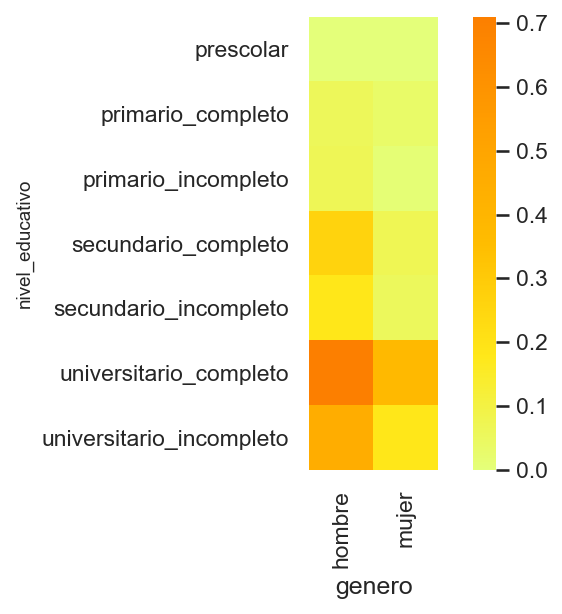

In [240]:
df_tmp = df[['anios_estudiados', 'genero', 'tiene_alto_valor_adquisitivo']].copy()
df_tmp['nivel_educativo'] = df_tmp['anios_estudiados'].apply(categorizar_por_educacion)

cooccurrence = pd.pivot_table(
    df_tmp,
    'tiene_alto_valor_adquisitivo',
    'nivel_educativo',
    'genero',
    'mean'
).sort_index()

plt.figure(dpi=150)
plt.ylabel("Valor adquisitivo respecto del nivel educativo y el genero", fontsize=9)
sns.heatmap(cooccurrence, square=True, cmap="Wistia")
plt.show()

Consistentemente con los resultados anteriores, un alto nivel educativo se corresponde con un alto poder adquisitivo, y predominan los hombres de poder adquisitivo elevado.

Seguimos trabajando con el atributo nivel educativo, y esta vez lo intersecaremos con las categorías del atributo rol familiar registrado.

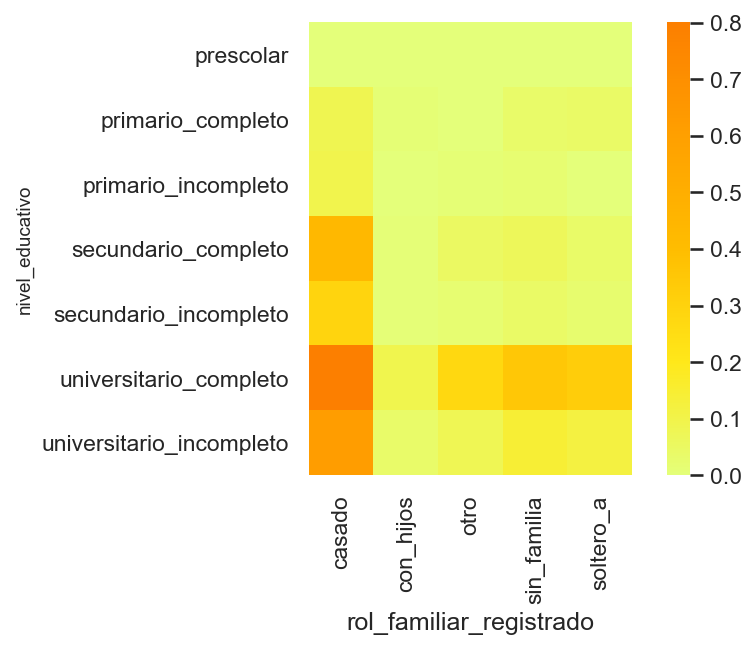

In [241]:
df_tmp = df[['anios_estudiados', 'rol_familiar_registrado', 'tiene_alto_valor_adquisitivo']].copy()
df_tmp['nivel_educativo'] = df_tmp['anios_estudiados'].apply(categorizar_por_educacion)

cooccurrence = pd.pivot_table(
    df_tmp,
    'tiene_alto_valor_adquisitivo',
    'nivel_educativo',
    'rol_familiar_registrado',
    'mean'
).sort_index()

plt.figure(dpi=150)
plt.ylabel("Valor adquisitivo respecto del nivel educativo y el rol familiar registrado", fontsize=9)
sns.heatmap(cooccurrence, square=True, cmap="Wistia")
plt.show()

Seguimos viendo la concentración de individuos con alto poder adquisitivo entre quienes más años de estudio tienen, y también que entre las personas de alto poder adquisitivo predominan quienes se han casado.

Para finalizar, estudiemos los distintos tipos de trabajo y sus categorías en relación al poder adquisitivo.

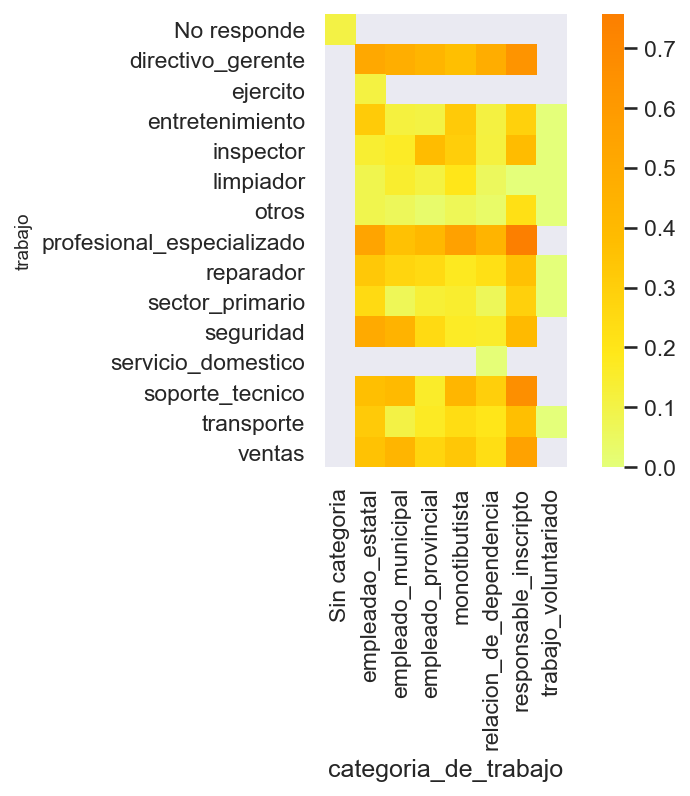

In [242]:
df_tmp = df[['trabajo', 'categoria_de_trabajo', 'tiene_alto_valor_adquisitivo']].copy()

cooccurrence = pd.pivot_table(
    df_tmp,
    'tiene_alto_valor_adquisitivo',
    'trabajo',
    'categoria_de_trabajo',
    'mean'
).sort_index()

plt.figure(dpi=150)
plt.ylabel("Valor adquisitivo respecto del trabajo y la categoria de trabajo", fontsize=9)
sns.heatmap(cooccurrence, square=True, cmap="Wistia")
plt.show()

Este gráfico nos muestra una distribución más variada, donde los trabajos que se ubican debajo de la categoria profesional especializado parecen tener más individuos con un poder adquisitivo alto, y los que están por arriba menos individuos con dicha característica, a excepción de los directivos gerentes, que en todas sus categorías presentan una marcada tendencia a tener un poder adquisitivo elevado. Igual que en casos anteriores, la categoría responsable inscripto agrupa a muchas personas de poder adquisitivo alto.

TODO: En lugar de un heatmap, podríamos cambiar por dos barplots, uno para hombres y otro para mujeres, con el rendimiento en la bolsa para cada género.

TODO: relación entre horas trabajadas y rendimiento en la bolsa

TODO: años de educación alcanzada

In [92]:
def baseline(df):
    lista = []
    acertados = 0
    for index, row in df.iterrows():
        if (row.anios_estudiados >= 18):
            tiene_alto_valor_adquisitivo = 1
        elif (row.anios_estudiados < 10):
            tiene_alto_valor_adquisitivo = 0
        elif (row.ganancia_perdida_declarada_bolsa_argentina != 0):
            tiene_alto_valor_adquisitivo = 1
        else:
            tiene_alto_valor_adquisitivo = 0
        lista.append(tiene_alto_valor_adquisitivo)
        if(row.tiene_alto_valor_adquisitivo == tiene_alto_valor_adquisitivo):
            acertados += 1
    print("Acertamos " + str((acertados * 100) / len(df)) + "%")

In [93]:
baseline(df)

Acertamos 78.64778521840634%
